# NLP Basic Assignment
## 과제 : spam.csv를 활용하여 유의미한 해석을 도출해주세요!

- 제출자: 20기 황태연
- 제출 일자: 2023.09.05. (화)

In [4]:
import pandas as pd

## Load Data
- 보시면 아시다시피 spam.csv는 라벨이 있는 데이터입니다.
- 7주차 주제가 텍스트 기초인만큼 텍스트만 활용하셔도 되고 라벨까지 활용하셔서 모델을 돌려보셔도 좋습니다.

In [2]:
spam = pd.read_csv('spam.csv')

In [6]:
spam

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [14]:
spam.iloc[5]['v2']

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

- 주어진 데이터의 v1 열에는 spam 여부를 알려주고 있습니다. (**ham**: 정상적인 메일, **spam**: 스팸 메일)
- 주어진 데이터의 v2 열에는 메일의 메시지를 담고 있습니다.

## Tokenizing


In [9]:
import nltk

In [15]:
# 예시 코드 코드
from nltk.tokenize import word_tokenize

nltk.download('punkt')
word_tokenize(spam.iloc[5]['v2'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Poco\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['FreeMsg',
 'Hey',
 'there',
 'darling',
 'it',
 "'s",
 'been',
 '3',
 'week',
 "'s",
 'now',
 'and',
 'no',
 'word',
 'back',
 '!',
 'I',
 "'d",
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still',
 '?',
 'Tb',
 'ok',
 '!',
 'XxX',
 'std',
 'chgs',
 'to',
 'send',
 ',',
 'å£1.50',
 'to',
 'rcv']

In [32]:
df = spam.copy(deep=True)
for i, sentence in enumerate(spam['v2']):
    tokenized = word_tokenize(sentence)
    df.iloc[i]['v2'] = tokenized
df

,v1,v2
0,ham,"[Go, until, jurong, point, ,, crazy, .., Avail..."
1,ham,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,spam,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,ham,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,ham,"[Nah, I, do, n't, think, he, goes, to, usf, ,,..."
...,...,...
5567,spam,"[This, is, the, 2nd, time, we, have, tried, 2,..."
5568,ham,"[Will, Ì_, b, going, to, esplanade, fr, home, ?]"
5569,ham,"[Pity, ,, *, was, in, mood, for, that, ., So, ..."
5570,ham,"[The, guy, did, some, bitching, but, I, acted,..."


## Embedding

- 수업에서 다룬 임베딩 방법에는 One-hot encoding, CBOW, Skip-gram 등이 있었습니다. 다양한 시도와 '비교' 결과를 함께 적어주세요! 파라미터를 조정해가는 과정도 해석에 도움이 될 수 있겠죠 :)

- 먼저 v1의 ham을 0, spam을 1로 대체하겠습니다.

In [33]:
df['v1'] = df['v1'].map({'ham': 0, 'spam': 1})
df

,v1,v2
0,0,"[Go, until, jurong, point, ,, crazy, .., Avail..."
1,0,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,1,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,0,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,0,"[Nah, I, do, n't, think, he, goes, to, usf, ,,..."
...,...,...
5567,1,"[This, is, the, 2nd, time, we, have, tried, 2,..."
5568,0,"[Will, Ì_, b, going, to, esplanade, fr, home, ?]"
5569,0,"[Pity, ,, *, was, in, mood, for, that, ., So, ..."
5570,0,"[The, guy, did, some, bitching, but, I, acted,..."


In [23]:
from gensim.models.word2vec import Word2Vec

- 다음은 **CBOW** 모델을 이용하여 Embedding하는 과정입니다.

In [37]:
cbow = Word2Vec(df['v2'], vector_size=64, window=5, sg=0) # sg=0: CBOW

cbow.wv['Go']

array([ 0.17461504, -0.11225516,  0.17904866,  0.10587597,  0.04406561,
       -0.20048538,  0.04356166, -0.02396907, -0.25862744, -0.05301462,
        0.1400026 , -0.15034395, -0.06913327, -0.11292073,  0.04905464,
        0.12162694, -0.07781198,  0.0378564 , -0.00419809,  0.23424022,
        0.12190858,  0.23602445,  0.13016264, -0.23006895, -0.0335867 ,
        0.19989906, -0.17106183, -0.00258611,  0.00042204, -0.13265987,
       -0.01951596,  0.08070308, -0.10717758, -0.12405824, -0.11508061,
       -0.00150742,  0.04444776, -0.00478612,  0.12589908,  0.14512569,
       -0.04933322, -0.00186809, -0.0568903 , -0.05588645,  0.13396454,
       -0.06786254, -0.05607125, -0.09760626, -0.01817763,  0.18679151,
        0.08378771,  0.07449537,  0.13089335,  0.11598013,  0.0627162 ,
        0.03599519,  0.06765975, -0.10018036, -0.13700317,  0.15634726,
       -0.06300936, -0.04642586, -0.01974674,  0.08611065], dtype=float32)

In [51]:
df_cbow = df.copy(deep=True)

embedding = []
for sentence in df['v2']:
    embedded = [cbow.wv[word] for word in sentence if word in cbow.wv]
    embedding.append(embedded)

df_cbow['v2'] = embedding
df_cbow

,v1,v2
0,0,"[[0.17461504, -0.112255156, 0.17904866, 0.1058..."
1,0,"[[0.36491826, -0.37652797, 0.33321294, 0.52858..."
2,1,"[[0.39473972, -0.22605853, 0.4858645, 0.267811..."
3,0,"[[0.5441137, -0.5795811, 0.6321912, 0.73309, 0..."
4,0,"[[0.06601783, -0.046738744, 0.045798346, 0.076..."
...,...,...
5567,1,"[[0.47624964, -0.34937456, 0.49868166, 0.39225..."
5568,0,"[[0.36517927, -0.3197429, 0.33371273, 0.392063..."
5569,0,"[[0.5888483, -0.49973533, 0.5405273, 0.5929760..."
5570,0,"[[0.615889, -0.39819667, 0.71765834, 0.4097949..."


In [54]:
print('가장 긴 임베딩 벡터의 길이:', max(len(sentence) for sentence in df_cbow['v2']))

가장 긴 임베딩 벡터의 길이: 198


- 모든 임베딩 벡터의 길이가 198이 되도록 설정해줍니다.

In [58]:
padding = []
for sentence in df_cbow['v2']:
    if len(sentence) < 198:
        sentence = sentence + [[0.]*64]*(198 - len(sentence))
    padding.append(sentence)

df_cbow['v2'] = padding
df_cbow

,v1,v2
0,0,"[[0.17461504, -0.112255156, 0.17904866, 0.1058..."
1,0,"[[0.36491826, -0.37652797, 0.33321294, 0.52858..."
2,1,"[[0.39473972, -0.22605853, 0.4858645, 0.267811..."
3,0,"[[0.5441137, -0.5795811, 0.6321912, 0.73309, 0..."
4,0,"[[0.06601783, -0.046738744, 0.045798346, 0.076..."
...,...,...
5567,1,"[[0.47624964, -0.34937456, 0.49868166, 0.39225..."
5568,0,"[[0.36517927, -0.3197429, 0.33371273, 0.392063..."
5569,0,"[[0.5888483, -0.49973533, 0.5405273, 0.5929760..."
5570,0,"[[0.615889, -0.39819667, 0.71765834, 0.4097949..."


- 다음은 **skip-gram** 모델을 이용하여 Embedding하는 과정입니다.

In [38]:
skip_gram = Word2Vec(df['v2'], vector_size=64, window=5, sg=1) # sg=1: skip-gram

skip_gram.wv['Go']

array([ 0.21610375, -0.07939548,  0.3083103 ,  0.2542443 ,  0.01980864,
       -0.21631068,  0.1466012 , -0.07620279, -0.33306426, -0.07551491,
        0.2615391 , -0.15815543, -0.13122055, -0.14254774,  0.00431737,
        0.16977102, -0.12908344,  0.08219767,  0.04433397,  0.33971506,
        0.13121113,  0.38591737,  0.22857548, -0.3355557 , -0.1123373 ,
        0.2979409 , -0.25571963,  0.02124315,  0.06669454, -0.18302669,
       -0.07662039,  0.08809253, -0.14120649, -0.07994217, -0.15837322,
        0.0567178 ,  0.06060111,  0.07195002,  0.2039583 ,  0.18121412,
       -0.15022998,  0.06501244, -0.00907351, -0.09493   ,  0.0840243 ,
       -0.0903206 , -0.03688104, -0.18633612, -0.09798368,  0.2728871 ,
        0.17502151,  0.01511193,  0.22599283,  0.19357684,  0.0464323 ,
        0.01248483,  0.09377052, -0.12472778, -0.1508858 ,  0.16001716,
       -0.05947038, -0.04379879,  0.09873495,  0.08267926], dtype=float32)

In [61]:
df_sg = df.copy(deep=True)

embedding = []
for sentence in df['v2']:
    embedded = [skip_gram.wv[word] for word in sentence if word in skip_gram.wv]
    embedding.append(embedded)

df_sg['v2'] = embedding
df_sg

,v1,v2
0,0,"[[0.21610375, -0.07939548, 0.3083103, 0.254244..."
1,0,"[[0.0078469515, -0.25899208, 0.009520756, 0.22..."
2,1,"[[0.07769693, 0.065753244, 0.5814194, 0.368394..."
3,0,"[[-0.42191222, -0.36229122, 0.30826178, 0.3781..."
4,0,"[[0.22021635, -0.1840905, 0.17533225, 0.283469..."
...,...,...
5567,1,"[[0.250206, -0.13415644, 0.49190277, 0.3690134..."
5568,0,"[[0.23505598, -0.25596222, 0.14994644, 0.32742..."
5569,0,"[[0.29481345, -0.36580938, 0.12977646, 0.19148..."
5570,0,"[[0.30323505, -0.012514892, 0.5053642, 0.17012..."


In [62]:
print('가장 긴 임베딩 벡터의 길이:', max(len(sentence) for sentence in df_sg['v2']))

가장 긴 임베딩 벡터의 길이: 198


In [63]:
padding = []
for sentence in df_sg['v2']:
    if len(sentence) < 198:
        sentence = sentence + [[0.]*64]*(198 - len(sentence))
    padding.append(sentence)

df_sg['v2'] = padding
df_sg

,v1,v2
0,0,"[[0.21610375, -0.07939548, 0.3083103, 0.254244..."
1,0,"[[0.0078469515, -0.25899208, 0.009520756, 0.22..."
2,1,"[[0.07769693, 0.065753244, 0.5814194, 0.368394..."
3,0,"[[-0.42191222, -0.36229122, 0.30826178, 0.3781..."
4,0,"[[0.22021635, -0.1840905, 0.17533225, 0.283469..."
...,...,...
5567,1,"[[0.250206, -0.13415644, 0.49190277, 0.3690134..."
5568,0,"[[0.23505598, -0.25596222, 0.14994644, 0.32742..."
5569,0,"[[0.29481345, -0.36580938, 0.12977646, 0.19148..."
5570,0,"[[0.30323505, -0.012514892, 0.5053642, 0.17012..."


- 위와 같이 df_cbow와 df_sg를 얻었습니다.
- 이를 이용하여 이진 분류 모델을 만들어보겠습니다.

## 본인이 도출해낸 해석을 적어주세요!

- 유사도, Wordcloud, 이진 분류 모델, Plot 뭐든 상관없으니 분명하고 인상적인 해석을 적어주시면 됩니다.

- 훈련 데이터와 테스트 데이터를 split합니다.

In [286]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train_cbow, X_test_cbow, y_train_cbow, y_test_cbow = train_test_split(df_cbow['v2'], df_cbow['v1'], test_size=0.2)
X_train_sg, X_test_sg, y_train_sg, y_test_sg = train_test_split(df_sg['v2'], df_sg['v1'], test_size=0.2)

In [287]:
X_train_cbow = X_train_cbow.reset_index(drop=True)
X_test_cbow = X_test_cbow.reset_index(drop=True)
y_train_cbow = y_train_cbow.reset_index(drop=True)
y_test_cbow = y_test_cbow.reset_index(drop=True)

X_train_sg = X_train_sg.reset_index(drop=True)
X_test_sg = X_test_sg.reset_index(drop=True)
y_train_sg = y_train_sg.reset_index(drop=True)
y_test_sg = y_test_sg.reset_index(drop=True)

In [288]:
torch.Tensor([0])

tensor([0.])

In [289]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class DataSet(Dataset):
    def __init__(self, vec, label = None):
        super(DataSet, self).__init__()
        self._vec = vec
        self._label = label

    def __len__(self):
        return len(self._vec)

    def __getitem__(self, idx):
        if self._label is None: # test
            vec = torch.FloatTensor(self._vec[idx])
            return vec

        else:
            vec = torch.FloatTensor(self._vec[idx])
            label = torch.FloatTensor([self._label[idx]])
            return vec, label
        
train_dataset_cbow = DataSet(X_train_cbow, y_train_cbow)
train_loader_cbow = DataLoader(train_dataset_cbow, batch_size = 64, shuffle = True, drop_last = False)

test_dataset_cbow = DataSet(X_test_cbow, y_test_cbow)
test_loader_cbow = DataLoader(test_dataset_cbow, batch_size = 64, shuffle = False, drop_last = False)

train_dataset_sg = DataSet(X_train_sg, y_train_sg)
train_loader_sg = DataLoader(train_dataset_sg, batch_size = 64, shuffle = True, drop_last = False)

test_dataset_sg = DataSet(X_test_sg, y_test_sg)
test_loader_sg = DataLoader(test_dataset_sg, batch_size = 64, shuffle = False, drop_last = False)

In [290]:
next(iter(train_loader_sg))

[tensor([[[ 0.0078, -0.2590,  0.0095,  ..., -0.2951,  0.6716, -0.0878],
          [ 0.2618, -0.3188,  0.2668,  ..., -0.3770,  0.5660,  0.2103],
          [ 0.1387, -0.3592,  0.1661,  ..., -0.0218,  0.3624,  0.1323],
          ...,
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],
 
         [[ 0.2464, -0.2571,  0.1294,  ..., -0.1425,  0.2843,  0.0447],
          [ 0.2948, -0.3658,  0.1298,  ..., -0.0151,  0.0700, -0.0629],
          [ 0.0348, -0.4505,  0.4774,  ..., -0.2822,  0.4324,  0.0877],
          ...,
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],
 
         [[ 0.2680, -0.1929,  0.2216,  ..., -0.0876,  0.1886,  0.0585],
          [ 0.3515, -0.5925,

- 이제 위에서 얻은 데이터를 이용해서 이진 분류 모델을 만들어봅시다.

- 해당 모델의 구현은 NNAdv 구현을 참고하였습니다.

In [291]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [300]:
import torch
import torch.nn as nn

class SimpleLSTM(nn.Module):
    def __init__(self, input_size=64, hidden_size=32, output_size=1):
        super(SimpleLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size*198, output_size)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x, _ = self.lstm(x)
        x = x.reshape(-1, self.hidden_size*198)
        x = self.fc(x)
        x = self.sigmoid(x)
        return x

model = SimpleLSTM().to(device)

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [301]:
epochs = 5
def train(model, train_loader):
    model.train()
    train_loss = 0
    correct = 0

    for batch, label in train_loader:
        batch = batch.to(device)
        label = label.to(device)
        
        optimizer.zero_grad()
        output = model(batch)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        prediction = torch.FloatTensor([0 if out < 0.5 else 1 for out in output]).to(device)
        correct += prediction.eq(label.view_as(prediction)).sum().item()
      
    train_loss /= len(train_loader)
    train_accuracy = 100. * correct / len(train_loader.dataset)
    return train_loss, train_accuracy # 훈련 오차, 정확도

def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for batch, label in test_loader:
            batch = batch.to(device)
            label = label.to(device)
            output = model(batch)
            test_loss += criterion(output, label).item()
            prediction = torch.FloatTensor([0 if out < 0.5 else 1 for out in output]).to(device)
            correct += prediction.eq(label.view_as(prediction)).sum().item()

    test_loss /= len(test_loader)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy # 검증/시험 데이터의 오차, 정확도

- 가장 간단한 LSTM 모델로 스팸 메일을 구분하는 학습을 시켜보도록 하겠습니다.

- **CBOW**로 임베딩한 데이터에 대한 학습

[EPOCH: 1], 	Train Loss: 0.3346, 	Train Accuracy: 87.48 %, 	Val Loss: 0.2805, 	Val Accuracy: 88.61 % 

[EPOCH: 2], 	Train Loss: 0.2079, 	Train Accuracy: 92.33 %, 	Val Loss: 0.2393, 	Val Accuracy: 91.75 % 

[EPOCH: 3], 	Train Loss: 0.1748, 	Train Accuracy: 93.76 %, 	Val Loss: 0.2040, 	Val Accuracy: 93.54 % 

[EPOCH: 4], 	Train Loss: 0.1546, 	Train Accuracy: 94.68 %, 	Val Loss: 0.1935, 	Val Accuracy: 94.08 % 

[EPOCH: 5], 	Train Loss: 0.1454, 	Train Accuracy: 94.84 %, 	Val Loss: 0.2025, 	Val Accuracy: 93.45 % 



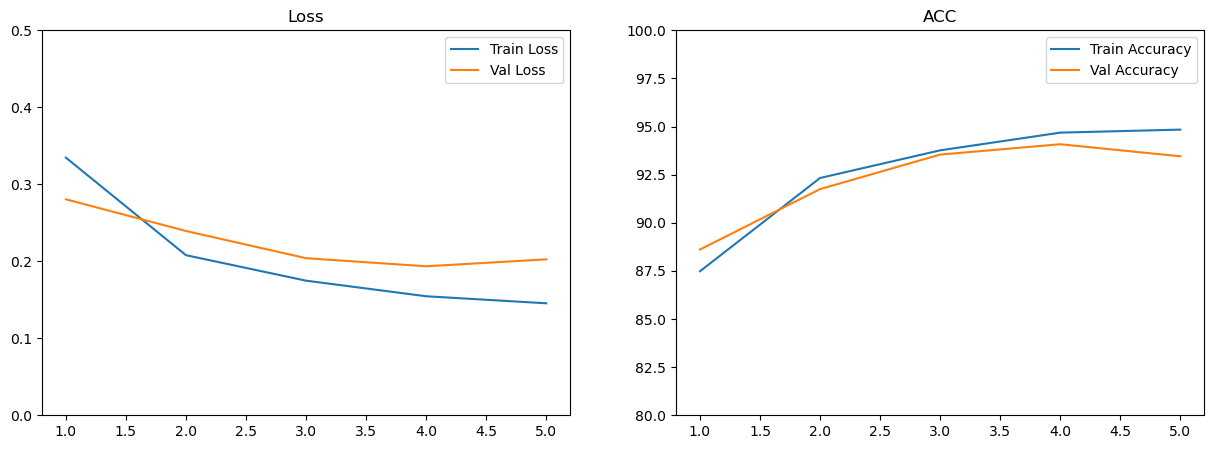

In [306]:
import matplotlib.pyplot as plt

model = SimpleLSTM().to(device)

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

result_list = []
for epoch in range(1, epochs + 1):
    train_loss, train_accuracy = train(model, train_loader_cbow)
    val_loss, val_accuracy = evaluate(model, test_loader_cbow)
    print(f"[EPOCH: {epoch}], \tTrain Loss: {train_loss:.4f}, \tTrain Accuracy: {train_accuracy:.2f} %, \tVal Loss: {val_loss:.4f}, \tVal Accuracy: {val_accuracy:.2f} % \n")
    result = {
        'EPOCH': epoch,
        'Train Loss': train_loss,
        'Train Accuracy': train_accuracy,
        'Val Loss': val_loss,
        'Val Accuracy': val_accuracy}

    result_list.append(result)
    
result_df = pd.DataFrame(result_list)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result_df['EPOCH'], result_df['Train Loss'], label='Train Loss')
axes[0].plot(result_df['EPOCH'], result_df['Val Loss'], label='Val Loss')
axes[0].set_ylim(0.0, 0.5)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result_df['EPOCH'], result_df['Train Accuracy'], label='Train Accuracy')
axes[1].plot(result_df['EPOCH'], result_df['Val Accuracy'], label='Val Accuracy')
axes[1].set_ylim(80, 100)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

- **skip-gram**으로 임베딩한 데이터에 대한 학습

[EPOCH: 1], 	Train Loss: 0.2815, 	Train Accuracy: 90.20 %, 	Val Loss: 0.1274, 	Val Accuracy: 95.70 % 

[EPOCH: 2], 	Train Loss: 0.0945, 	Train Accuracy: 96.63 %, 	Val Loss: 0.1003, 	Val Accuracy: 96.59 % 

[EPOCH: 3], 	Train Loss: 0.0803, 	Train Accuracy: 97.17 %, 	Val Loss: 0.0960, 	Val Accuracy: 96.68 % 

[EPOCH: 4], 	Train Loss: 0.0767, 	Train Accuracy: 97.51 %, 	Val Loss: 0.0905, 	Val Accuracy: 97.22 % 

[EPOCH: 5], 	Train Loss: 0.0726, 	Train Accuracy: 97.80 %, 	Val Loss: 0.0799, 	Val Accuracy: 97.49 % 



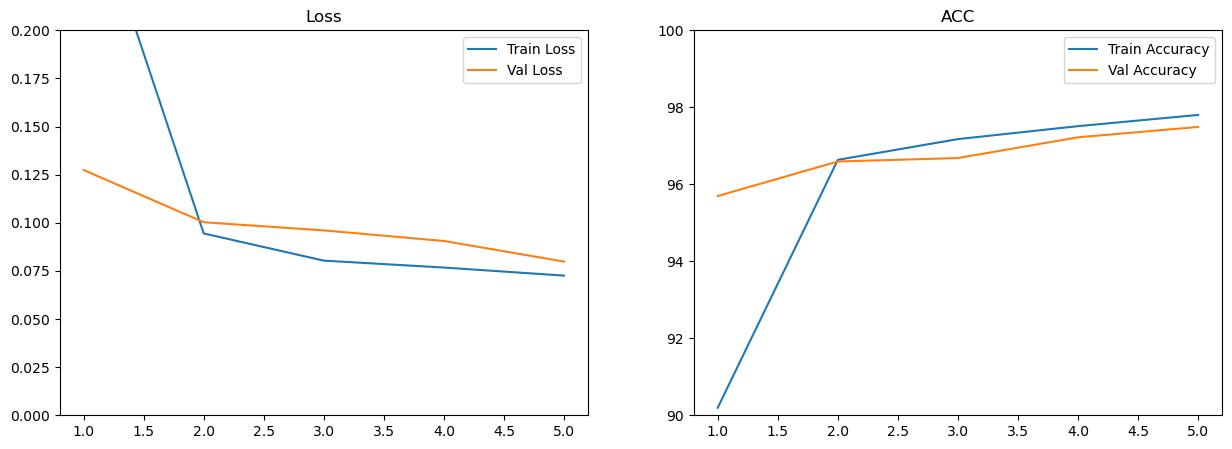

In [307]:
import matplotlib.pyplot as plt

model = SimpleLSTM().to(device)

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

result_list = []
for epoch in range(1, epochs + 1):
    train_loss, train_accuracy = train(model, train_loader_sg)
    val_loss, val_accuracy = evaluate(model, test_loader_sg)
    print(f"[EPOCH: {epoch}], \tTrain Loss: {train_loss:.4f}, \tTrain Accuracy: {train_accuracy:.2f} %, \tVal Loss: {val_loss:.4f}, \tVal Accuracy: {val_accuracy:.2f} % \n")
    result = {
        'EPOCH': epoch,
        'Train Loss': train_loss,
        'Train Accuracy': train_accuracy,
        'Val Loss': val_loss,
        'Val Accuracy': val_accuracy}

    result_list.append(result)
    
result_df = pd.DataFrame(result_list)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result_df['EPOCH'], result_df['Train Loss'], label='Train Loss')
axes[0].plot(result_df['EPOCH'], result_df['Val Loss'], label='Val Loss')
axes[0].set_ylim(0.0, 0.2)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result_df['EPOCH'], result_df['Train Accuracy'], label='Train Accuracy')
axes[1].plot(result_df['EPOCH'], result_df['Val Accuracy'], label='Val Accuracy')
axes[1].set_ylim(90, 100)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

- CBOW로 임베딩한 데이터로 이진 분류를 하는 것보다 **skip-gram**으로 임베딩한 데이터로 이진 분류를 하는 것이 더 좋은 성능을 보였습니다.
- **CBOW** 임베딩 데이터로는 평균적으로 **93.5%**로 스팸 메일을 구분하였습니다.
- **skip-gram** 임베딩 데이터로는 평균적으로 **97.5%**로 스팸 메일을 구분하였습니다.